# This Notebook is created to make a classification of the dataset "Titanic" to predict if a person would Survive or not to the disaster:
- Get the datasets from Kaggle API.
- Exploratory Data Analysis
- Feature Engineer.
- Model creation.
- Metrics of the models.

In [4]:
pip install kaggle

In [3]:
import os
import pandas as pd
import zipfile

ModuleNotFoundError: No module named 'pandas'

In [1]:
import kaggle

# Configurar la ruta donde se guardarán los datos descargados
data_dir = "data/titanic"
os.makedirs(data_dir, exist_ok=True)

# Descargar los datos de Kaggle
kaggle.api.competition_download_files('titanic', path=data_dir)

# Ruta al archivo descargado
zip_path = os.path.join(data_dir, 'titanic.zip')

# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

ModuleNotFoundError: No module named 'kaggle'

# Import dataframes:

In [4]:
# Cargar los datos en DataFrames de pandas
train_data_path = os.path.join(data_dir, 'train.csv')
test_data_path = os.path.join(data_dir, 'test.csv')
predictions_structure = os.path.join(data_dir, 'gender_submission.csv')

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
df_predictions_structure = pd.read_csv(predictions_structure)

In [5]:
df_train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
df_predictions_structure.head(2)

,PassengerId,Survived
0,892,0
1,893,1


# Exploratory Data Analysis:

We will only use tha Dataframe named "df_train" for the exploration:

In [8]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
df_train.shape

(891, 12)

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## There are 891 raws and 12 columns. The objective variable is named "**Survived**". We will need to explore all the variables to identify the most valuable for the predictions:

### Results of the Report:

There's a lot of alerts:

Alerts

- Age has 177 (19.9%) missing values	Missing
- Cabin has 687 (77.1%) missing values	Missing
- PassengerId is uniformly distributed	Uniform
- PassengerId has unique values	Unique
- Name has unique values	Unique
- SibSp has 608 (68.2%) zeros	Zeros
- Parch has 678 (76.1%) zeros	Zeros
- Fare has 15 (1.7%) zeros	Zeros

I decided to drop the columns "Cabin" because has more 77% of Null values.

In [11]:
df_train.drop(['Cabin'], axis=1, inplace = True)

## Data Imputation:

I will imputate the 19.9% missing values of the column "Age". Let's explore the best way of imputation:

In [12]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


## We will use imputation data by KNN because there are few raws

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer

# Columns selected for imputation:
columns_imputation = ['Pclass','Fare','Pclass','Age']
df_imputation = df_train[columns_imputation].copy()

knn = KNNImputer(n_neighbors=1)
age_imputed = knn.fit_transform(df_imputation)

df_imputation['Age_new'] = age_imputed[:, df_imputation.columns.get_loc('Age')]

<Axes: >

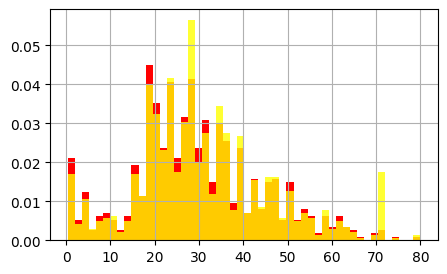

In [14]:
# Explore distribution of data before and after imputation:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)

# original data
df_imputation['Age'].hist(bins=50, ax=ax, density=True, color='red')

# The argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_imputation['Age_new'].hist(bins=50, ax=ax, color='yellow', density=True, alpha=0.8)

In [15]:
# Check the values imputated:

df_imputation[df_imputation['Age'].isna()]

,Pclass,Fare,Pclass,Age,Age_new
5,3,8.4583,3,NaN,21.0
17,2,13.0000,2,NaN,34.0
19,3,7.2250,3,NaN,45.5
26,3,7.2250,3,NaN,45.5
28,3,7.8792,3,NaN,19.0
...,...,...,...,...,...
859,3,7.2292,3,NaN,28.5
863,3,69.5500,3,NaN,24.0
868,3,9.5000,3,NaN,29.0
878,3,7.8958,3,NaN,28.0


In [16]:
# We will use the new column in the dataframe:

df_train['Age'] = df_imputation['Age_new']

# Feature Engineer:

We have to transform some columns to use them in the model:

In [17]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [18]:
# I will drop the variable "Ticket" because doesn't have relevant information:

df_train.drop(['Ticket'], axis=1, inplace=True)

## Transform categorical features to numerical features with One Hot Encoder:

In [19]:
# Transform variable "Sex" to numerical through One Hot Encoder:

df_train = pd.get_dummies(df_train, columns=['Sex'], dtype=float)

In [20]:
# Transform variable "Embarked" to numerical through One Hot Encoder:

df_train = pd.get_dummies(df_train, columns=['Embarked'], dtype=float)

In [21]:
# Transform variable "Pclass" to numerical through One Hot Encoder:

df_train = pd.get_dummies(df_train, columns=['Pclass'], dtype=float)

In [22]:
df_train.head(2)

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Let's explore the correlation matrix:

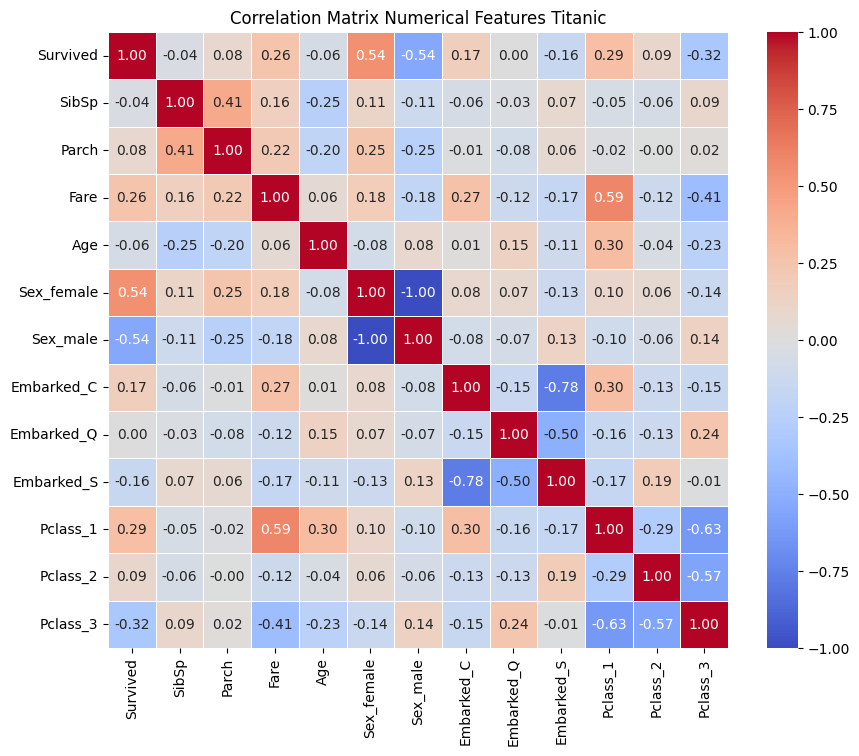

In [24]:
import seaborn as sns

correlation_matrix = df_train[['Survived','SibSp','Parch','Fare','Age','Sex_female'
                               ,'Sex_male','Embarked_C','Embarked_Q','Embarked_S','Pclass_1','Pclass_2',
                              'Pclass_3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Numerical Features Titanic')
plt.show()

## Conclusions:

- It looks like gender female is correlated with people who survived to the Titanic.
- The variable "Pclass" is a few correlated with people who survived to the Titanic.
- Tha variable "Fare" is a few correlated with people who survived to the Titanic.

## Let's explore variable "Name" to check if we could get valuable information:

In [25]:
df_train['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [26]:
# Divide the names by tokens and get the most frequent tokens for people who survived and who doesn't survived:

from collections import Counter

df_train_name = df_train.copy()
df_train_name['Name_tokens'] = df_train['Name'].str.split()

survived_tokens = df_train_name[df_train_name['Survived'] == 1]['Name_tokens'].sum()
not_survived_tokens = df_train_name[df_train_name['Survived'] == 0]['Name_tokens'].sum()

survived_counter = Counter(survived_tokens)
not_survived_counter = Counter(not_survived_tokens)

top_survived_tokens = survived_counter.most_common(10)
top_not_survived_tokens = not_survived_counter.most_common(10)

print("Tokens más frecuentes para los pasajeros que sobrevivieron:")
print(top_survived_tokens)

print("\nTokens más frecuentes para los pasajeros que no sobrevivieron:")
print(top_not_survived_tokens)

Tokens más frecuentes para los pasajeros que sobrevivieron:
[('Miss.', 127), ('Mrs.', 99), ('Mr.', 81), ('Master.', 23), ('William', 21), ('John', 11), ('Henry', 10), ('Anna', 9), ('Mary', 9), ('Elizabeth', 7)]

Tokens más frecuentes para los pasajeros que no sobrevivieron:
[('Mr.', 436), ('Miss.', 55), ('William', 41), ('John', 33), ('Mrs.', 26), ('Henry', 23), ('James', 18), ('Master.', 17), ('Charles', 16), ('George', 16)]


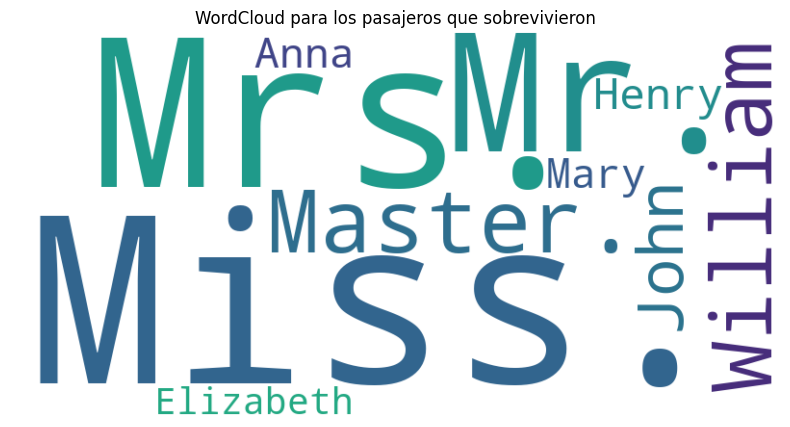

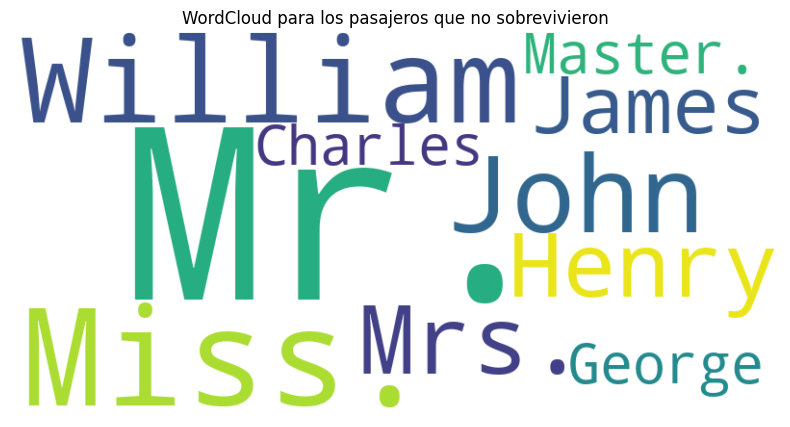

In [28]:
# Create a Wordcloud ofr each one:

from wordcloud import WordCloud

wordcloud_survived = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_survived_tokens))

wordcloud_not_survived = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_not_survived_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_survived, interpolation='bilinear')
plt.title('WordCloud para los pasajeros que sobrevivieron')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_survived, interpolation='bilinear')
plt.title('WordCloud para los pasajeros que no sobrevivieron')
plt.axis('off')
plt.show()

# Conclusion:
- Doesn't exist a pattern in the data that shows a relation between the Name and the survival of the people in Titanic, let's drop the column name:

In [29]:
df_train.drop(['Name'], axis=1, inplace=True)

In [30]:
# We will drop too the PassengerId because only works as an identifier:
df_train.drop(['PassengerId'], axis=1, inplace=True)

## Apply StandardScaler to numerical features:

In [31]:
from sklearn.preprocessing import StandardScaler

# Select the features to be scaled
features_to_scale = ['Fare','Age']

# Extract the selected features
df_to_scale = df_train[features_to_scale].copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected features
df_scaled = scaler.fit_transform(df_to_scale)

# Reconstruct the DataFrame with scaled features
df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale)

# Replace the original features with scaled features in the original DataFrame
df_train[features_to_scale] = df_scaled

In [32]:
df_train.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.600795,1,0,-0.502445,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0.448743,1,0,0.786845,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,-0.338411,0,0,-0.488854,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0.251955,1,0,0.420730,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,0.251955,0,0,-0.486337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Divide data in test split:

In [33]:
from sklearn.model_selection import train_test_split

# Drop irrelevant columns or columns that contain non-numeric data
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Transform df_test:

In [34]:
# Columns selected for imputation:
columns_imputation = ['Pclass','Fare','Pclass','Age']
df_imputation_test = df_test[columns_imputation].copy()

age_imputed_test = knn.transform(df_imputation_test)

df_test['Age'] = age_imputed_test[:, df_imputation_test.columns.get_loc('Age')]

In [35]:
categorical_features = ['Pclass','Embarked','Sex']

for col in categorical_features:
    df_test = pd.get_dummies(df_test, columns=[col], dtype=float)

In [36]:
# Select the features to be scaled
features_to_scale = ['Fare','Age']

# Extract the selected features
df_to_scale_test = df_test[features_to_scale]

# Apply StandardScaler to the selected features
df_scaled_test = scaler.transform(df_to_scale_test)

# Reconstruct the DataFrame with scaled features
df_scaled_test = pd.DataFrame(df_scaled_test, columns=features_to_scale)

# Replace the original features with scaled features in the original DataFrame
df_test[features_to_scale] = df_scaled_test

In [37]:
columns_to_predict = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3']

In [38]:
# Obtener la columna "PassengerId" de df_test
passenger_ids = df_test['PassengerId']

In [39]:
# Exclude 'Survived' column from df2 columns
columns_to_include = df_train.columns.difference(['Survived'])

# Reorder columns of df1 according to the order of columns in df2 (excluding 'Survived' column)
df_test_ordered = df_test[list(columns_to_include)].copy()

In [40]:
df_test_ordered = df_test_ordered[['Age','SibSp','Parch','Fare','Sex_female','Sex_male'
                 ,'Embarked_C','Embarked_Q','Embarked_S','Pclass_1'
                ,'Pclass_2','Pclass_3']]
df_test_ordered.head(2)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.219157,0,0,-0.490783,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.039109,1,0,-0.507479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
df_test_ordered = df_test_ordered.fillna(df_test_ordered.mean())

# Create ML models:

In [43]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Entrenar el clasificador Random Forest con los mejores parámetros encontrados
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10)
rf_classifier.fit(X_train, y_train)

predictions_rf = rf_classifier.predict(X_test)
accuracy = np.mean(predictions_rf==y_test)
print('The accuracy of the Random Forest with sklearn, is {:.2f}%'.format(accuracy*100))

The accuracy of the Random Forest with sklearn, is 79.33%


In [44]:
# Create a Neural Network with sklearn:

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, alpha=25, random_state=0, hidden_layer_sizes=[2, 8],
                   solver='lbfgs', activation='tanh').fit(X_train, y_train)

predictions_mlp = mlp.predict(X_test)
accuracy = np.mean(predictions_mlp==y_test)
print('The accuracy of the neural network with sklearn, is {:.2f}%'.format(accuracy*100))

The accuracy of the neural network with sklearn, is 81.01%


# Conclusion:
- The best model is Neural Network with an accuracy of 81%